<a href="https://colab.research.google.com/github/springboardmentor425/B-13-SafetyEye-AI-Powered-Workplace-Occupancy-Safety-Monitor/blob/harish/SafetyEye_%E2%80%93_AI_Powered_Workplace_Occupancy_%26_Safety_Monitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!nvidia-smi

Thu Feb 26 15:58:24 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             32W /   70W |     413MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [18]:
!pip install ultralytics roboflow

In [19]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JIu614K8DmgTtKBiVEQl")
project = rf.workspace("harish-r0g1w").project("safety-n1jq2")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to safety-3 in yolov8:: 100%|██████████| 74/74 [00:00<00:00, 4757.93it/s]


In [20]:
!cat /content/safety-3/data.yaml

names:
- No Gloves
- No Helmet
- gloves
- helmet
- jacket
- no jacket
- nogloves
- nosafety glasses
- safety glasses
- shoes
nc: 10
roboflow:
  license: CC BY 4.0
  project: safety-n1jq2
  url: https://universe.roboflow.com/harish-r0g1w/safety-n1jq2/dataset/3
  version: 3
  workspace: harish-r0g1w
test: ../test/images
train: ../train/images
val: ../valid/images


In [21]:
from ultralytics import YOLO

# load model (pretrained)
model = YOLO("yolov8n.pt")   # nano version (fast & good)

# train model
model.train(
    data="/content/safety-3/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)


Ultralytics 8.4.17 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 3, 4, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7642fdbbc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

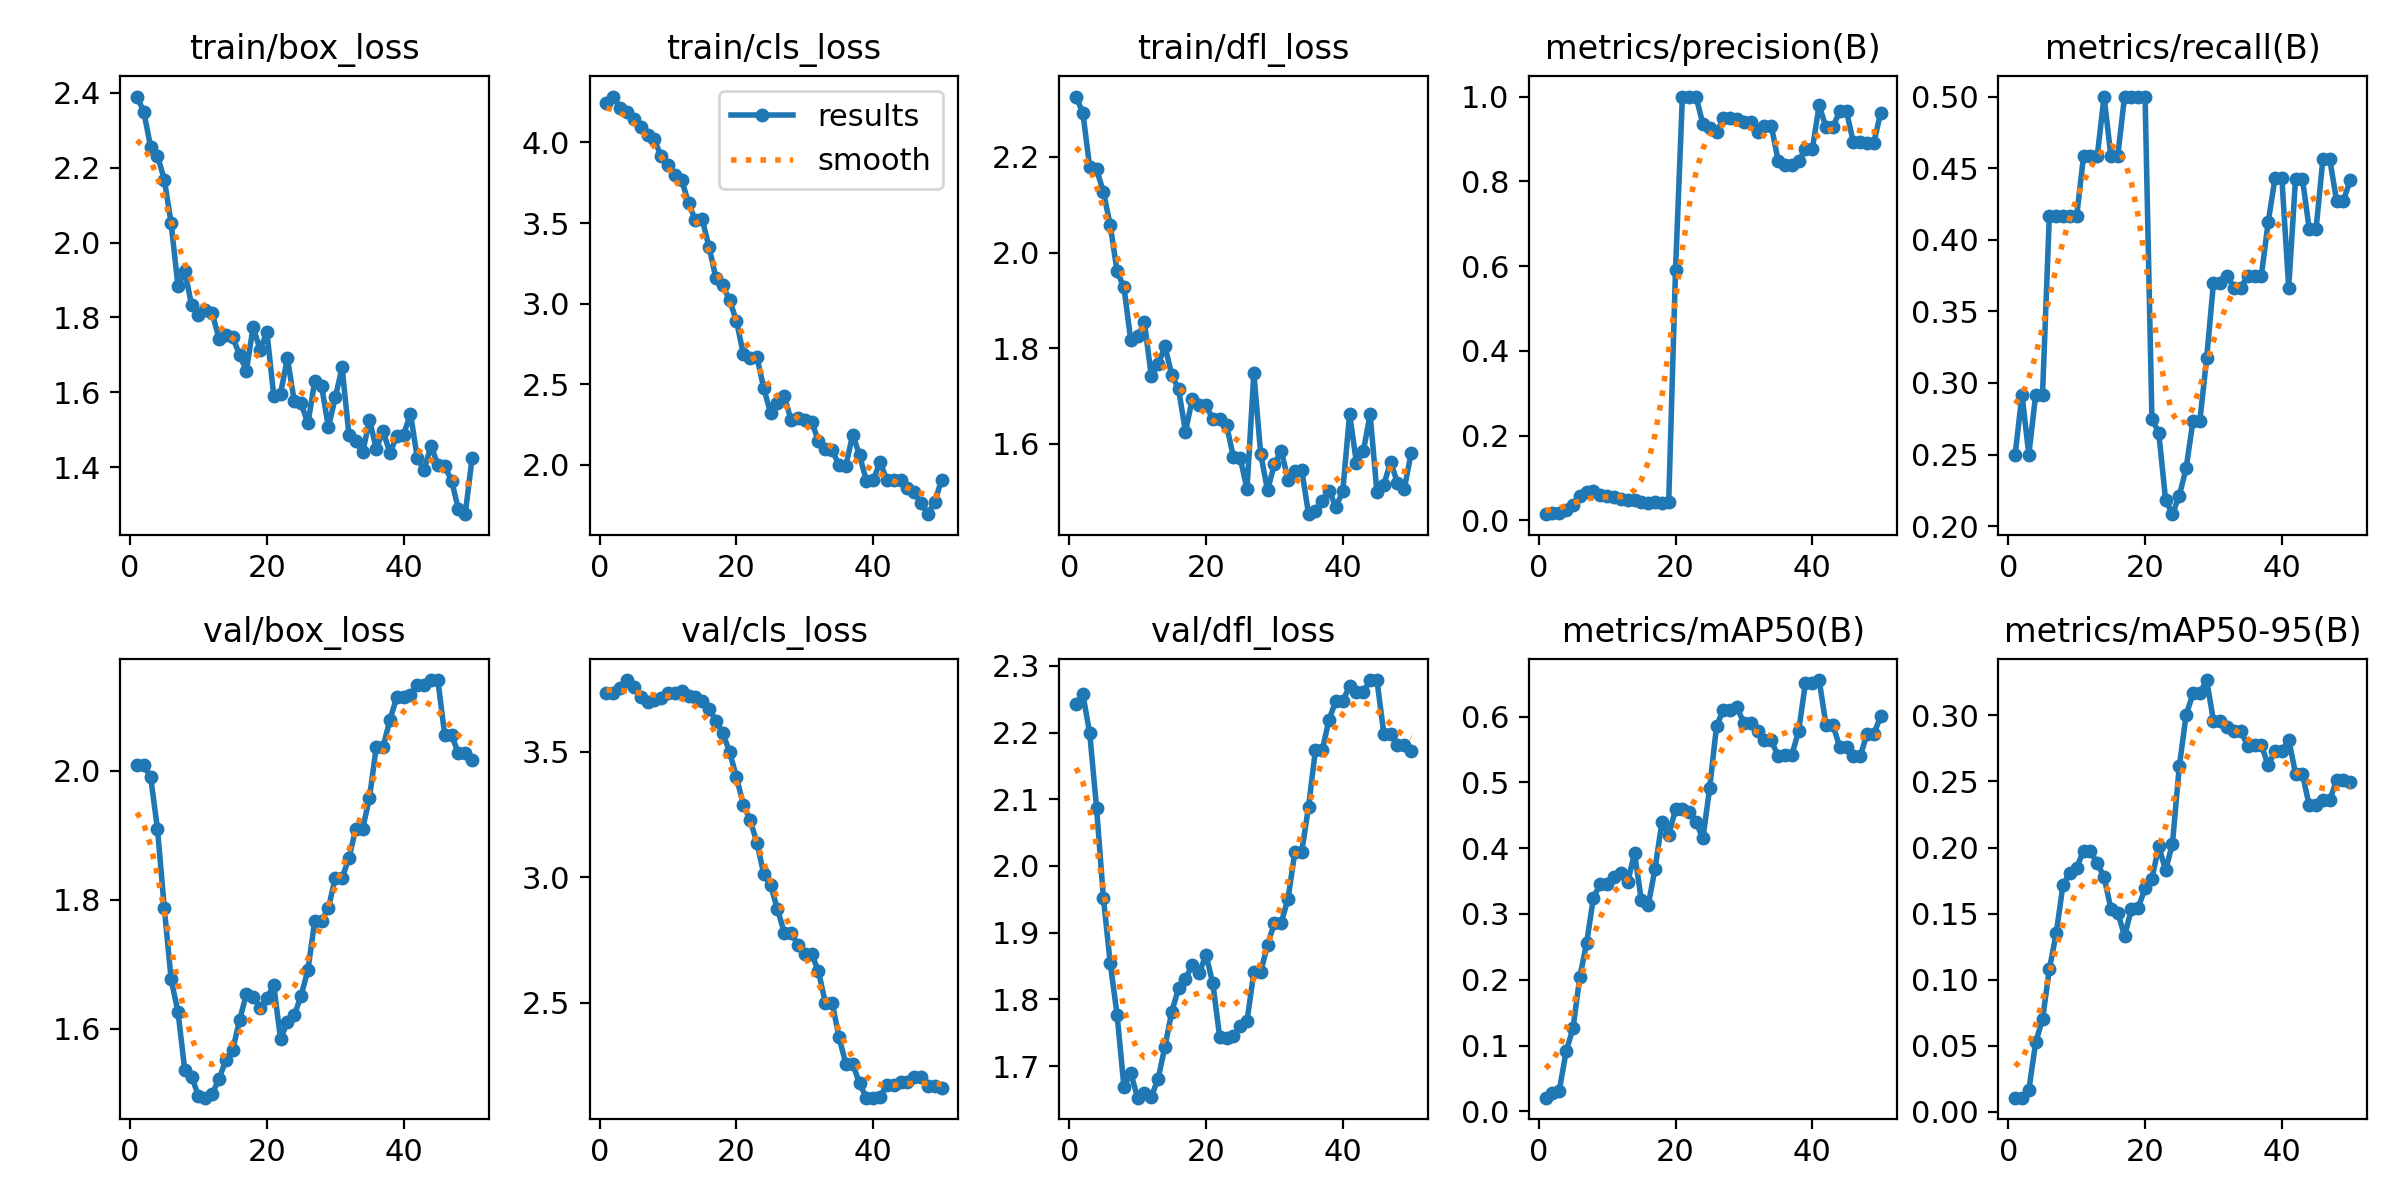

In [22]:
from IPython.display import Image
Image(filename='runs/detect/train/results.png')

In [23]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

In [24]:
model.predict(
    source="/content/safety-3/test/images",
    save=True,
    conf=0.25
)


image 1/3 /content/safety-3/test/images/image1_jpg.rf.da3112e8f2324e7c156967c20aa4f144.jpg: 640x640 (no detections), 8.0ms
image 2/3 /content/safety-3/test/images/image31_jpg.rf.5820796a5e7e65d3ab29339c38998ca1.jpg: 640x640 (no detections), 7.2ms
image 3/3 /content/safety-3/test/images/image3_jpg.rf.e2502f17f0e82fbd3af0aa230e0fd8e0.jpg: 640x640 1 helmet, 1 jacket, 7.2ms
Speed: 3.3ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'No Gloves', 1: 'No Helmet', 2: 'gloves', 3: 'helmet', 4: 'jacket', 5: 'no jacket', 6: 'nogloves', 7: 'nosafety glasses', 8: 'safety glasses', 9: 'shoes'}
 obb: None
 orig_img: array([[[ 35,  42,  39],
         [ 29,  36,  33],
         [ 20,  27,  24],
         ...,
         [207, 218, 216],
         [240, 250, 250],
         [241, 253, 253]],
 
        [[ 34,  41,  38],
         [ 28,  35,  32],
         [ 19,  26,  23],
         ...,
         [204, 215, 213],
         [242, 252, 252],
         [240, 252, 252]],
 
        [[ 31,  38,  35],
         [ 26,  33,  30],
         [ 17,  24,  21],
         ...,
         [198, 209, 207],
         [245, 255, 255],
         [239, 251, 253]],
 
        ...,
 
        [[ 71, 171, 166],
         [ 77, 180, 173],
         [ 73, 180, 171],
         ...,
         [ 16,  39,  47],
         [ 24,  46, 

In [25]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/last.pt")

In [26]:
model.predict(
    source="/content/safety-3/test/images",
    save=True,
    conf=0.25
)


image 1/3 /content/safety-3/test/images/image1_jpg.rf.da3112e8f2324e7c156967c20aa4f144.jpg: 640x640 2 helmets, 7.2ms
image 2/3 /content/safety-3/test/images/image31_jpg.rf.5820796a5e7e65d3ab29339c38998ca1.jpg: 640x640 (no detections), 7.2ms
image 3/3 /content/safety-3/test/images/image3_jpg.rf.e2502f17f0e82fbd3af0aa230e0fd8e0.jpg: 640x640 4 helmets, 4 jackets, 7.2ms
Speed: 2.4ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'No Gloves', 1: 'No Helmet', 2: 'gloves', 3: 'helmet', 4: 'jacket', 5: 'no jacket', 6: 'nogloves', 7: 'nosafety glasses', 8: 'safety glasses', 9: 'shoes'}
 obb: None
 orig_img: array([[[ 35,  42,  39],
         [ 29,  36,  33],
         [ 20,  27,  24],
         ...,
         [207, 218, 216],
         [240, 250, 250],
         [241, 253, 253]],
 
        [[ 34,  41,  38],
         [ 28,  35,  32],
         [ 19,  26,  23],
         ...,
         [204, 215, 213],
         [242, 252, 252],
         [240, 252, 252]],
 
        [[ 31,  38,  35],
         [ 26,  33,  30],
         [ 17,  24,  21],
         ...,
         [198, 209, 207],
         [245, 255, 255],
         [239, 251, 253]],
 
        ...,
 
        [[ 71, 171, 166],
         [ 77, 180, 173],
         [ 73, 180, 171],
         ...,
         [ 16,  39,  47],
         [ 24,  46, 

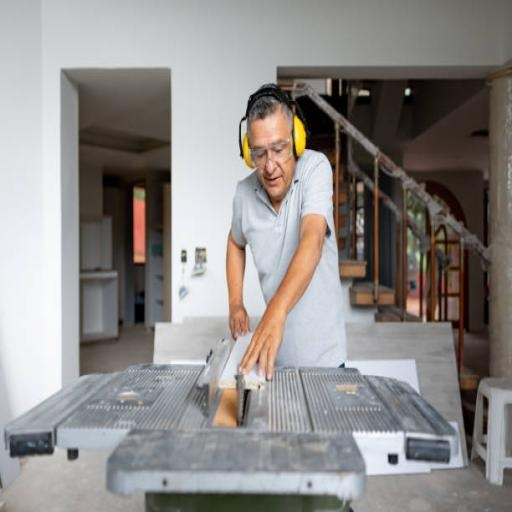

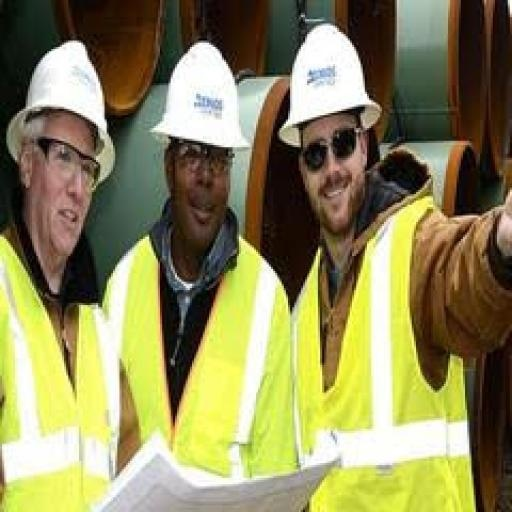

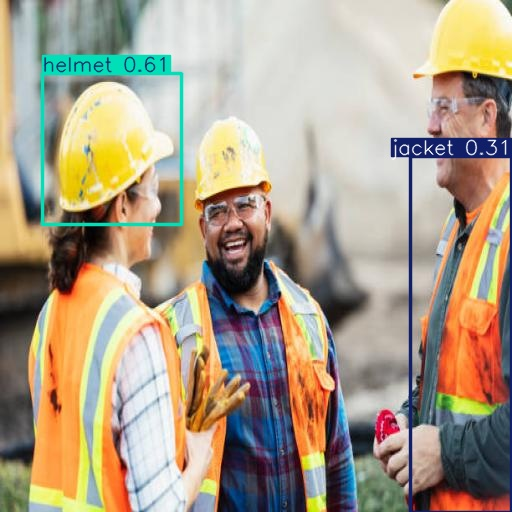

In [27]:
import os
from IPython.display import Image, display

path = "runs/detect/predict"

for img in os.listdir(path)[:5]:
    display(Image(filename=f"{path}/{img}"))


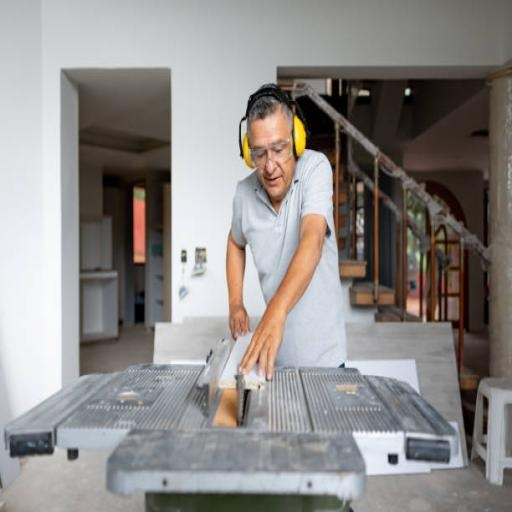

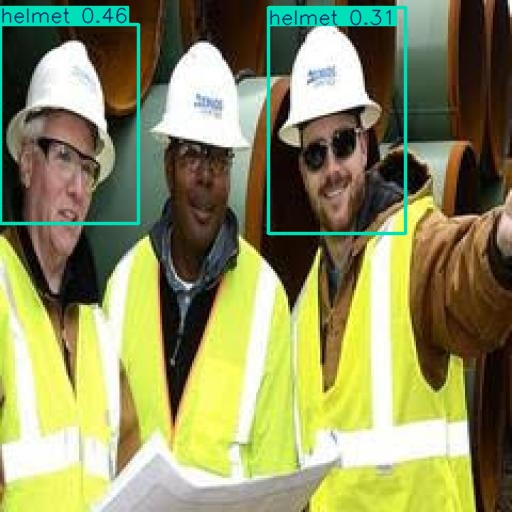

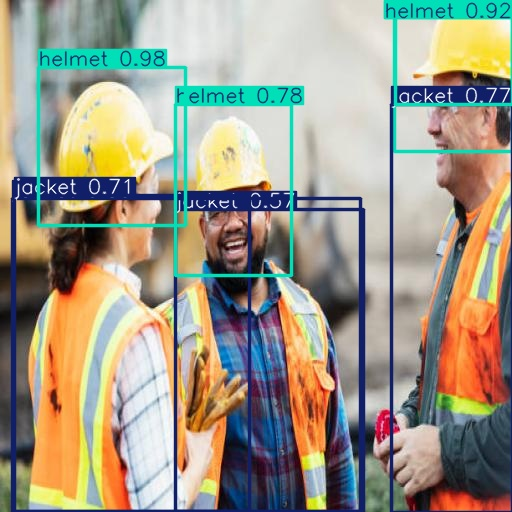

In [28]:
import os
from IPython.display import Image, display

path = "runs/detect/predict2"

for img in os.listdir(path)[:5]:
    display(Image(filename=f"{path}/{img}"))


In [29]:
from google.colab import files
files.download('runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('runs/detect/train/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>